# Customer Segmentation Analysis

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from kmodes import kmodes
%matplotlib inline

In [17]:
dataset=pd.read_csv('./data/census.csv')
dataset.head()

,age,workclass,education,maritalstatus,occupation,race,sex,hoursperweek,nativecountry,over50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,White,Male,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,0


In [22]:
km = kmodes.KModes(n_clusters=3, init='Huang', n_init=5, verbose=0)
clusters = km.fit_predict(x)
df_dummy['clusters'] = clusters

In [26]:
km.cluster_centroids_

array([[ 1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [25,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(df_dummy.ix[:,0:12])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [28]:
plot_columns

array([[ 0.86932258, -0.16232763],
       [-0.69769612, -0.10681509],
       [ 0.19502758,  0.97455638],
       ...,
       [ 0.23264733,  0.40090001],
       [ 0.86932258, -0.16232763],
       [-0.69769612, -0.10681509]])

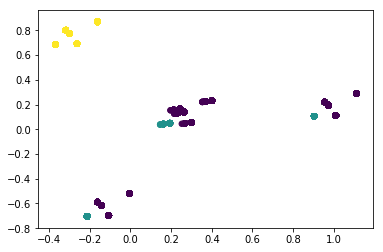

In [29]:
# Plot based on the two dimensions, and shade by cluster label
plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df_dummy["clusters"], s=30)
plt.show()